# 1. Data Understanding

In [1]:
# Import library
import pandas as pd
import numpy as np
import statistics as st
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In [4]:
# import datafram PAT for Analytics

df = pd.read_excel('C:/Users/00026324/Documents/99. Training SMF - 2023/02. Forestry Data Scientist/Master Data PAT_2016.xlsx')

# show datframe
df.tail(10)

,Region,Company,Distrik,Petak Stand,KeyId,PAT Type,Invent Date,Type Areal,Luas,Luas Normal,Tipe Lahan,Species,Seedlot Clone,Standar Stocking,Jumlah Plot,Stocking Total,Stocking,ST Adjustment,Survival Rate,Tinggi,TT Adjustment,Peninggi,Diameter,DBH Adjustment,Weed Control,WC Adjustment,Single Stem,CAI,CAI Adj,Topography,Site Class,Rotasi,Spacing Baris,Spacing Jalur,TPHA,TPHA pl,SPHA,TSV_m3_sub,TRV_m3_sub,SE,PLE,MAI3_TOB,MAI_4,MAI_5,Month Inv,Year Inv,MTH,% TPHA,Plant_Date,Year_PT,Umur,Prev_Veg,Actual Ton/Ha,Status_Regain,Land_Type,SPEC2,Species1,Species2,LandType_Species,LandType_Species2,LandType_Species3,CODIS
5851,PALEMBANG P3,PT. SEBANGUN BUMI ANDALAS,D.TELUK_PULAI,TPL3510,01L3005100,PAT36,2016-05-16,4,22.7,22.7,Marine clay,Aman,AM12035PB1,1333,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,A,IV,2,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0.00,5,2016,0.0,0.0,2013-05-16,2013,36,HTI,-,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DTP
5852,PALEMBANG P3,PT. SEBANGUN BUMI ANDALAS,D.TELUK_PULAI,TPL3520,01L3005200,PAT36,2016-05-16,4,11.2,11.2,Marine clay,Aman,AM12035PB1,1333,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,A,IV,2,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0.00,5,2016,0.0,0.0,2013-05-16,2013,36,HTI,-,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DTP
5853,PALEMBANG P3,PT. SEBANGUN BUMI ANDALAS,D.TELUK_PULAI,TPL3550,01L3005500,PAT36,2016-05-16,4,10.9,10.9,Marine clay,Aman,AM12035PB1,1333,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,A,IV,2,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0.00,5,2016,0.0,0.0,2013-05-16,2013,36,HTI,-,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DTP
5854,PALEMBANG P3,PT. SEBANGUN BUMI ANDALAS,D.TELUK_PULAI,TPL4510,01L4005100,PAT36,2016-05-16,4,22.5,22.5,Marine clay,Aman,AM12035PB1,1333,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,A,IV,2,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0.00,5,2016,0.0,0.0,2013-05-16,2013,36,HTI,-,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DTP
5855,PALEMBANG P3,PT. SEBANGUN BUMI ANDALAS,D.TELUK_PULAI,TPL4640,01L4006400,PAT36,2016-05-15,1,11.1,11.0,Marine clay,Aman,AM12035PB1,1333,3,52.51,52.51,52.51,45.6,9.88,9.88,12.76,12.08,12.08,100.0,100.0,0.0,15.78,15.78,A,IV,2,0.0,0.0,0,0,0,0,0,0,0,16.0,0,19.51,5,2016,12.8,0.0,2013-05-15,2013,36,HTI,-,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DTP
5856,PALEMBANG P3,PT. SEBANGUN BUMI ANDALAS,D.TELUK_PULAI,TPL4641,01L4006401,PAT36,2016-06-22,1,11.1,11.0,Marine clay,Aman,AM12035PB1,1333,3,1.25,1.25,1.25,1.3,11.10,11.10,0.00,17.00,17.00,100.0,100.0,0.0,0.66,0.66,A,IV,1,0.0,0.0,0,0,0,0,0,0,0,0.7,0,0.84,6,2016,0.0,0.0,2013-06-22,2013,36,Replanting,-,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DTP
5857,PALEMBANG P3,PT. SEBANGUN BUMI ANDALAS,D.TELUK_PULAI,TPL4650,01L4006500,PAT36,2016-05-15,11,11.0,11.0,Marine clay,Aman,AM12035PB1,1333,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,A,IV,2,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0.00,5,2016,0.0,0.0,2013-05-15,2013,36,HTI,-,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DTP
5858,PALEMBANG P3,PT. SEBANGUN BUMI ANDALAS,D.TELUK_PULAI,TPL4660,01L4006600,PAT36,2016-06-22,1,11.8,12.0,Marine clay,Aman,AM12035PB1,1333,3,25.00,25.00,25.00,25.3,9.03,9.03,10.45,12.84,12.84,70.8,70.8,0.0,7.45,7.45,A,IV,2,0.0,0.0,0,0,0,0,0,0,0,7.6,0,9.66,6,2016,10.5,0.0,2013-06-22,2013,36,HTI,-,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DTP
5859,PALEMBANG P3,PT. SEBANGUN BUMI ANDALAS,D.TELUK_PULAI,TPL4670,01L4006700,PAT36,2016-06-22,1,11.9,12.0,Marine clay,Aman,AM12035PB1,1333,3,13.75,13.75,13.75,13.3,9.44,9.44,10.98,13.31,13.31,95.8,95.8,0.0,4.63,4.63,A,IV,2,0.0,0.0,0,0,0,0,0,0,0,4.7,0,5.79,6,2016,11.0,0.0,2013-06-22,2013,36,HTI,-,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DTP
5860,PALEMBANG P3,PT. SEBANGUN BUMI ANDALAS,D.TELUK_PULAI,TPL4671,01L4006701,PAT36,2016-06-22,1,12.0,12.0,Marine clay,Aman,AM12035PB1,1333,3,2.50,2.50,2.50,2.0,8.15,8.15,0.00,15.00,15.00,100.0,100.0,0.0,0.83,0.83,A,IV,1,0.0,

In [5]:
# Checking Dimensi dataframe
print("Jumlah kolom :", df.shape[1]) # indexing 1
print("Jumlah baris :", df.shape[0]) # indexing 0

Jumlah kolom : 62
Jumlah baris : 5861


In [6]:
# Create function checking Unique, Jumlah Unique, Nan, % Nan,

df_describe =[]

for i in df.columns: #mengiterasi i di setiap kolom pada df
    df_describe.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list airbnb_describe
        i,
        df[i].dtypes,#tipe
        df[i].isna().sum(),#jumlah NaN
        round((((df[i].isna().sum())/(len(df)))*100),2),#Persentase jumlah NaN
        df[i].nunique(),#Jumlah Unique
        df[i].unique() #Unique
        
    ])

In [7]:
DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique']) # membuat dataframe dengan data PAT_describe dengan kolom-kolom tersebut

In [8]:
DESC #Menterjemahkan jumlah unique, Nan Value (String and Integeter Data)

,column,type,nan,nan%,nunique,unique
0,Region,object,0,0.00,3,"[PALEMBANG P1, PALEMBANG P2, PALEMBANG P3]"
1,Company,object,0,0.00,3,"[PT. BUMI MEKAR HIJAU, PT. BUMI ANDALAS PERMAI..."
2,Distrik,object,0,0.00,18,"[D.GEBANG, D.KETUPAK, D.PADANG_SUGIHAN, D.SIMP..."
3,Petak Stand,object,0,0.00,4512,"[SGX1100, SGX1150, SGK3010, SGK3080, SGM5150, ..."
4,KeyId,object,0,0.00,4512,"[20X1001000, 20X1001500, 20K3000100, 20K300080..."
5,PAT Type,object,0,0.00,4,"[PAT36, PAT02, PAT12, PAT06]"
6,Invent Date,datetime64[ns],0,0.00,239,"[2016-12-25T00:00:00.000000000, 2016-05-22T00:..."
7,Type Areal,int64,0,0.00,11,"[1, 5, 11, 4, 7, 16, 88, 6, 14, 10, 99]"
8,Luas,float64,0,0.00,320,"[15.9, 11.9, 23.1, 23.8, 4.4, 24.6, 24.7, 24.0..."
9,Luas Normal,float64,0,0.00,320,"[16.0, 12.0, 23.0, 24.0, 4.0, 24.6, 24.7, 22.0..."


- Berdasarkan deskripsi data PAT2016 ini diketauhi dataframe berisi assessment dari PAT02, PAT06, PAT12, PAT36
- Untuk memudahkan grouping, species kita pakai yang secara di level lebih general. Namun dapat disesuaikan dengan kebutuhan analisis. Untuk sesi kali ini, kita akan gunakan kolom LandType_SPecies2 dimana Akan ada species Acacia dan Eucalyptus dengan land type MC dan Peat
- Terdapat beberapa column terdapat nilainya namun value = 0. Agar memudahkan analisa, kita drop saja
- Year Inv akan kita drop karena vaue nya homogen
- Actual Ton/Ha isi nya merupakan numeric namun tipe masih string, sehingga harus di convert ke numeric

In [9]:
df.describe().T #describe yang di transpose kan untuk mengeluarkan summary basic statistcal details pada data

,count,mean,std,min,25%,50%,75%,max
Type Areal,5861.0,3.788091,12.056868,1.0,1.00,1.00,1.00,99.00
Luas,5861.0,19.331326,6.094906,0.1,12.70,22.00,23.40,45.20
Luas Normal,5861.0,19.320543,6.095844,0.1,12.80,22.00,23.40,45.20
Standar Stocking,5861.0,1381.958710,282.826948,0.0,1333.00,1333.00,1666.00,2777.00
Jumlah Plot,5861.0,7.260024,4.585698,0.0,4.00,7.00,12.00,23.00
Stocking Total,5861.0,72.214851,37.577230,0.0,62.06,90.02,100.15,116.27
Stocking,5861.0,72.214851,37.577230,0.0,62.06,90.02,100.15,116.27
ST Adjustment,5861.0,72.214851,37.577230,0.0,62.06,90.02,100.15,116.27
Survival Rate,5861.0,69.578951,36.076073,0.0,60.70,85.81,96.37,100.00
Tinggi,5861.0,2.702945,3.550800,0.0,0.00,1.39,4.84,13.47


In [10]:
df.columns

Index(['Region', 'Company', 'Distrik', 'Petak Stand', 'KeyId', 'PAT Type',
       'Invent Date', 'Type Areal', 'Luas', 'Luas Normal', 'Tipe Lahan',
       'Species', 'Seedlot Clone', 'Standar Stocking', 'Jumlah Plot',
       'Stocking Total', 'Stocking', 'ST Adjustment', 'Survival Rate',
       'Tinggi', 'TT Adjustment', 'Peninggi', 'Diameter', 'DBH Adjustment',
       'Weed Control', 'WC Adjustment', 'Single Stem', 'CAI', 'CAI Adj',
       'Topography', 'Site Class', 'Rotasi', 'Spacing Baris', 'Spacing Jalur',
       'TPHA', 'TPHA pl', 'SPHA', 'TSV_m3_sub', 'TRV_m3_sub', 'SE', 'PLE',
       'MAI3_TOB', 'MAI_4', 'MAI_5', 'Month Inv', 'Year Inv', 'MTH', '% TPHA',
       'Plant_Date', 'Year_PT', 'Umur', 'Prev_Veg', 'Actual Ton/Ha',
       'Status_Regain', 'Land_Type', 'SPEC2', 'Species1', 'Species2',
       'LandType_Species', 'LandType_Species2', 'LandType_Species3', 'CODIS'],
      dtype='object')

In [11]:
#drop column dengan value = 0

df_filtered = df.drop(columns=[ 'TPHA', 'TPHA pl', 'SPHA', 'TSV_m3_sub', 'TRV_m3_sub', 'SE', 'PLE','MAI_4','% TPHA','Year Inv'])

In [12]:
df_filtered['Actual Ton/Ha'] = pd.to_numeric(df_filtered['Actual Ton/Ha'], errors='coerce')


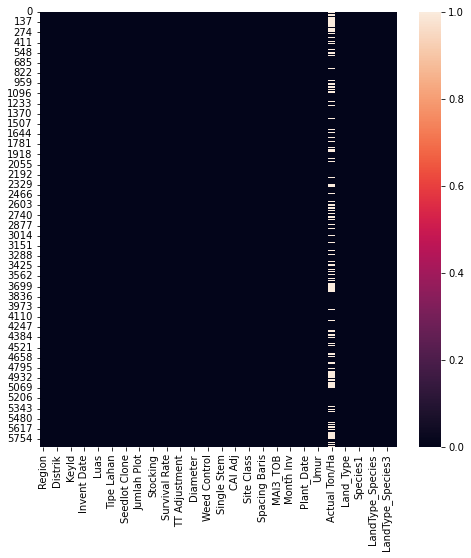

In [13]:
# Secara visualisasi dapat diperlihatkan Missing value
plt.figure(figsize=(8,8))# untuk size
sns.heatmap(df_filtered.isna()) # untuk plot heatmap NaN
plt.savefig('handling missing.png') # untuk mensave hasil plot

In [14]:
df_filtered.isnull().sum().sort_values(ascending=False)

Actual Ton/Ha        1761
Region                  0
Plant_Date              0
CAI Adj                 0
Topography              0
Site Class              0
Rotasi                  0
Spacing Baris           0
Spacing Jalur           0
MAI3_TOB                0
MAI_5                   0
Month Inv               0
MTH                     0
Year_PT                 0
Company                 0
Umur                    0
Prev_Veg                0
Status_Regain           0
Land_Type               0
SPEC2                   0
Species1                0
Species2                0
LandType_Species        0
LandType_Species2       0
LandType_Species3       0
CAI                     0
Single Stem             0
WC Adjustment           0
Seedlot Clone           0
Distrik                 0
Petak Stand             0
KeyId                   0
PAT Type                0
Invent Date             0
Type Areal              0
Luas                    0
Luas Normal             0
Tipe Lahan              0
Species     

In [15]:
df_filtered.head(5)

,Region,Company,Distrik,Petak Stand,KeyId,PAT Type,Invent Date,Type Areal,Luas,Luas Normal,Tipe Lahan,Species,Seedlot Clone,Standar Stocking,Jumlah Plot,Stocking Total,Stocking,ST Adjustment,Survival Rate,Tinggi,TT Adjustment,Peninggi,Diameter,DBH Adjustment,Weed Control,WC Adjustment,Single Stem,CAI,CAI Adj,Topography,Site Class,Rotasi,Spacing Baris,Spacing Jalur,MAI3_TOB,MAI_5,Month Inv,MTH,Plant_Date,Year_PT,Umur,Prev_Veg,Actual Ton/Ha,Status_Regain,Land_Type,SPEC2,Species1,Species2,LandType_Species,LandType_Species2,LandType_Species3,CODIS
0,PALEMBANG P1,PT. BUMI MEKAR HIJAU,D.GEBANG,SGX1100,20X1001000,PAT36,2016-12-25,1,15.9,16.0,Marine clay,Aman,AM12046SB2,1333,4,76.89,76.89,76.89,78.1,11.23,11.23,13.77,12.79,12.79,81.3,81.3,0.0,28.86,28.86,A,IV,1,0.0,0.0,29.3,34.02,12,13.8,2013-12-25,2013,36,HTI,21.580277,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DSG
1,PALEMBANG P1,PT. BUMI MEKAR HIJAU,D.GEBANG,SGX1150,20X1001500,PAT36,2016-12-25,1,11.9,12.0,Marine clay,Aman,AM12046SB2,1333,3,82.52,82.52,82.52,77.6,11.30,11.30,13.46,11.83,11.83,91.7,91.7,0.0,27.24,27.24,A,IV,1,0.0,0.0,27.6,32.40,12,13.5,2013-12-25,2013,36,HTI,35.673521,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DSG
2,PALEMBANG P1,PT. BUMI MEKAR HIJAU,D.GEBANG,SGK3010,20K3000100,PAT36,2016-05-22,1,23.1,23.0,Marine clay,Aman,AM12030,1333,6,78.76,78.76,78.76,79.2,9.68,9.68,13.02,11.58,11.58,100.0,100.0,0.0,22.10,22.10,A,IV,1,0.0,0.0,22.4,26.98,5,13.0,2013-05-22,2013,36,HTI,41.618447,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DSG
3,PALEMBANG P1,PT. BUMI MEKAR HIJAU,D.GEBANG,SGK3080,20K3000800,PAT36,2016-05-22,1,23.8,24.0,Marine clay,Aman,AM12030,1333,6,75.64,75.64,75.64,72.9,9.36,9.36,13.20,11.40,11.40,97.9,97.9,0.0,20.06,20.06,A,IV,1,0.0,0.0,20.4,24.71,5,13.2,2013-05-22,2013,36,HTI,64.741477,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DSG
4,PALEMBANG P1,PT. BUMI MEKAR HIJAU,D.GEBANG,SGM5150,20M5001500,PAT36,2016-11-20,1,4.4,4.0,Marine clay,Aman,AM12046SB2,1333,2,99.39,99.39,99.39,82.8,10.87,10.87,13.30,12.09,12.09,93.8,93.8,0.0,33.61,33.61,A,IV,1,0.0,0.0,34.1,39.38,11,13.3,2013-11-20,2013,36,HTI,49.921136,Non Regain,MC,Aman,AMAN,Acacia,AMANMC,AcaciaMC,AmanMC,DSG


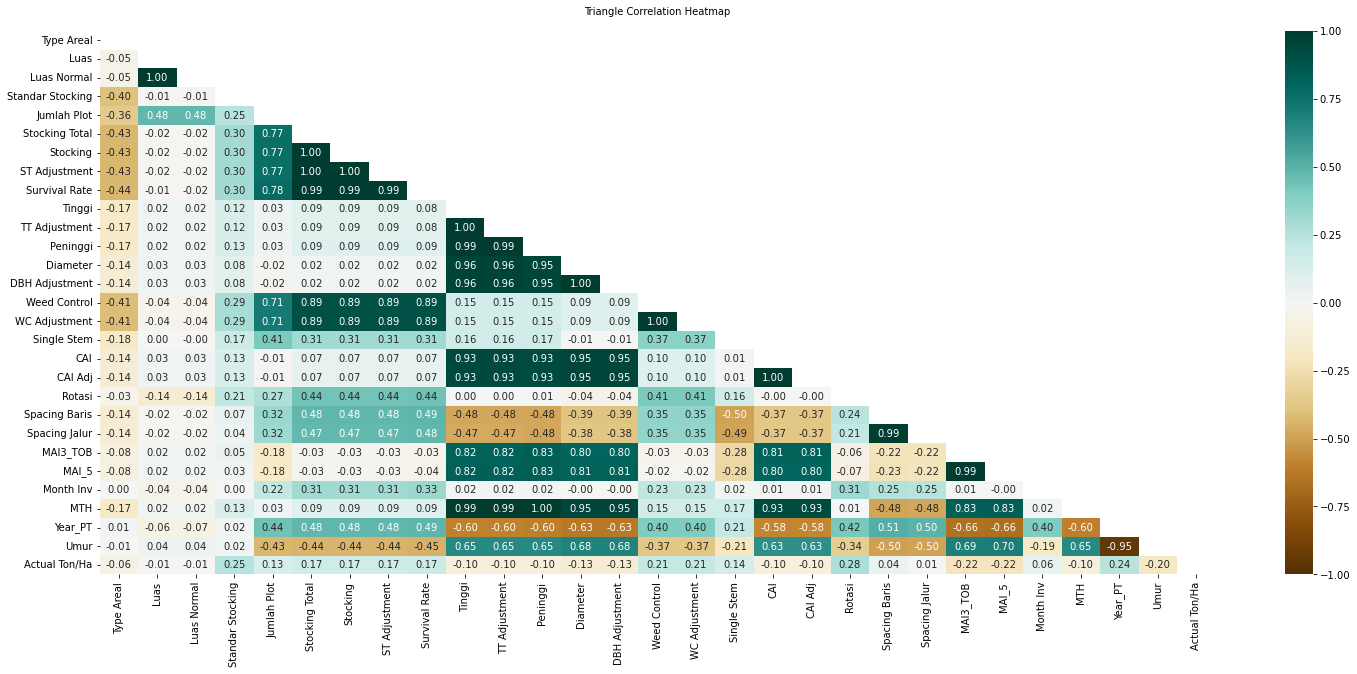

In [16]:
# Cek Korelasi secara general data

plt.figure(figsize=(25, 10))
# define the mask to set the values in the upper triangle to True
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df_filtered.select_dtypes(include=numerics)

mask = np.triu(np.ones_like(df_num.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',fmt='.2f')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 10}, pad=16);

plt.show()


In [ ]:
df_filtered.columns

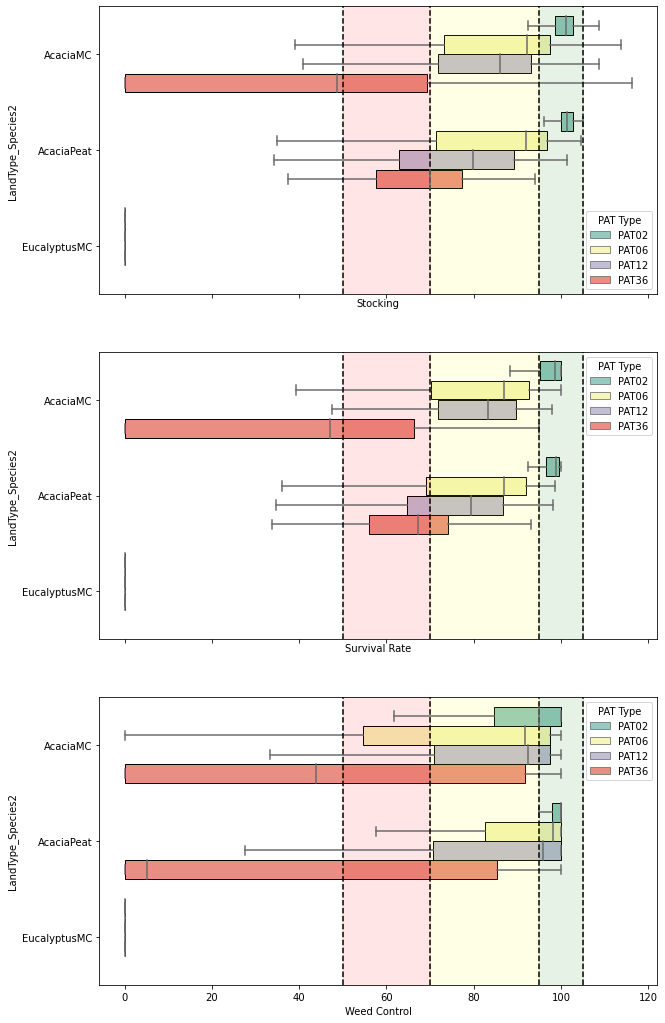

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
custom_palette = sns.color_palette("Set3")
box_properties = dict(linewidth=1, edgecolor='black')

# Define the order for 'PAT Type'
hue_order = ['PAT02', 'PAT06', 'PAT12', 'PAT36']  # Replace with your desired order

# Variables to include in the catplot
variables = ['Stocking', 'Survival Rate', 'Weed Control']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18), sharex=True)

# Iterate through variables and create individual boxplots
for i, variable in enumerate(variables):
    sns.boxplot(
        x=variable,
        y='LandType_Species2',
        hue='PAT Type',
        data=df_filtered,
        ax=axes[i],
        showfliers=False,
        palette=custom_palette,
        boxprops=box_properties,
        hue_order=hue_order
    )
    
    # Add blue lines at X=95
    axes[i].axvline(x=50, color='black', linestyle='--', label='X=50')
    axes[i].axvline(x=70, color='black', linestyle='--', label='X=70')
    axes[i].axvline(x=95, color='black', linestyle='--', label='X=95')
    axes[i].axvline(x=105, color='black', linestyle='--', label='X=105')
    axes[i].axvspan(95, 105, color='green', alpha=0.1)
    axes[i].axvspan(70, 95, color='yellow', alpha=0.1)
    axes[i].axvspan(50, 70, color='red', alpha=0.1)
    
    # Set x-axis label and title for each subplot
    axes[i]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
custom_palette = sns.color_palette("Set3")
box_properties = dict(linewidth=1, edgecolor='black')

# Define the order for 'PAT Type'
hue_order = ['PAT02', 'PAT06', 'PAT12', 'PAT36']  # Replace with your desired order

# Variables to include in the catplot
variables = ['Tinggi', 'Diameter']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Iterate through variables and create individual boxplots
for i, variable in enumerate(variables):
    sns.boxplot(
        x=variable,
        y='LandType_Species2',
        hue='PAT Type',
        data=df_filtered,
        ax=axes[i],
        showfliers=False,
        palette=custom_palette,
        boxprops=box_properties,
        hue_order=hue_order
    )
    
    # Add blue lines at X=95
    axes[i].axvline(x=0, color='black', linestyle='--', label='X=50')
    axes[i].axvline(x=2, color='black', linestyle='--', label='X=70')
    axes[i].axvline(x=3, color='black', linestyle='--', label='X=95')
    axes[i].axvline(x=6, color='black', linestyle='--', label='X=105')
    
    # Set x-axis label and title for each subplot
    axes[i]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
custom_palette = sns.color_palette("Set3")
box_properties = dict(linewidth=1, edgecolor='black')

# Define the order for 'PAT Type'
hue_order = ['PAT02', 'PAT06', 'PAT12', 'PAT36']  # Replace with your desired order

# Variables to include in the catplot
variables = ['CAI', 'MAI_5']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Iterate through variables and create individual boxplots
for i, variable in enumerate(variables):
    sns.boxplot(
        x=variable,
        y='LandType_Species2',
        hue='PAT Type',
        data=df_filtered,
        ax=axes[i],
        showfliers=False,
        palette=custom_palette,
        boxprops=box_properties,
        hue_order=hue_order
    )
    
    # Add blue lines at X=95
    axes[i].axvline(x=5, color='black', linestyle='--', label='X=50')
    axes[i].axvline(x=15, color='black', linestyle='--', label='X=70')
    axes[i].axvline(x=25, color='black', linestyle='--', label='X=95')
    axes[i].axvline(x=45, color='black', linestyle='--', label='X=105')
    axes[i].axvspan(5, 15, color='green', alpha=0.1)
    axes[i].axvspan(15, 25, color='yellow', alpha=0.1)
    axes[i].axvspan(25, 45, color='red', alpha=0.1)
    
    # Set x-axis label and title for each subplot
    axes[i]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Scatter plot for correlation analysis with regression line
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(
    x='Stocking',
    y='Weed Control',
    data=df_filtered,
    hue='PAT Type',
    alpha=0.8
)

# Add a legend
scatter_plot.legend(title='PAT Type')

# Add a regression line
slope, intercept, r_value, p_value, std_err = linregress(df_filtered['Stocking'], df_filtered['Weed Control'])
sns.lineplot(x=df_filtered['Stocking'], y=slope * df_filtered['Stocking'] + intercept, color='black', ax=scatter_plot)

# Calculate R-squared
r_squared = r_value**2

# Set axis labels and title
plt.xlabel('Stocking')
plt.ylabel('Weed Control')
plt.title('Scatter Plot with Regression Line for Correlation Analysis')

# Annotate with R-squared value
scatter_plot.annotate(f'R-squared: {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

# Show the plot
plt.show()


# 2. Explanatory Data Analysis - EDA

Cek data dengan value=0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
#custom_palette = sns.color_palette("Set3")

# Define the order for 'PAT Type'
hue_order = ['PAT02', 'PAT06', 'PAT12', 'PAT36']  # Replace with your desired order

# Variables to include in the histogram plot
variables = ['Stocking', 'Survival Rate', 'Weed Control']

# Set up subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(6, 14), sharex=True)

# Iterate through variables and create individual histogram plots
for i, variable in enumerate(variables):
    sns.histplot(
        x=variable,
        hue='PAT Type',
        data=df_filtered,
        ax=axes[i],
        multiple='stack',
        hue_order=hue_order
    )
    
    # Set y-axis label and title for each subplot
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].set_title(f'Histogram of {variable}', fontsize=12)

# Set x-axis label
axes[-1].set_xlabel('Value (%)', fontsize=12)

# Move the legend to the right side
plt.subplots_adjust(right=0.85)

# Add a common title
fig.suptitle('Histograms of Multiple Variables by Stocking Rate (%)', fontsize=14)

# Add a legend outside the plot area
#fig.legend(title='PAT Type', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 0.85, 0.95])

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
#custom_palette = sns.color_palette("Set3")

# Define the order for 'PAT Type'
hue_order = ['PAT02', 'PAT06', 'PAT12', 'PAT36']  # Replace with your desired order

# Variables to include in the histogram plot
variables = ['Tinggi', 'Diameter', 'CAI', 'MAI_5']

# Set up subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(6, 14), sharex=True)

# Iterate through variables and create individual histogram plots
for i, variable in enumerate(variables):
    sns.histplot(
        x=variable,
        hue='PAT Type',
        data=df_filtered,
        ax=axes[i],
        multiple='stack',
        hue_order=hue_order
    )
    
    # Set y-axis label and title for each subplot
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].set_title(f'Histogram of {variable}', fontsize=12)

# Set x-axis label
axes[-1].set_xlabel('Value', fontsize=12)

# Move the legend to the right side
plt.subplots_adjust(right=0.85)

# Add a common title
fig.suptitle('Histograms of Multiple Variables by Stocking Rate (%)', fontsize=14)

# Add a legend outside the plot area
#fig.legend(title='PAT Type', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 0.85, 0.95])

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
#custom_palette = sns.color_palette("Set3")

# Define the order for 'PAT Type'
hue_order = ['PAT02', 'PAT06', 'PAT12', 'PAT36']  # Replace with your desired order

# Variables to include in the histogram plot
variables = ['CAI', 'MAI_5']

# Set up subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(6, 14), sharex=True)

# Iterate through variables and create individual histogram plots
for i, variable in enumerate(variables):
    sns.histplot(
        x=variable,
        hue='PAT Type',
        data=df_filtered,
        ax=axes[i],
        multiple='stack',
        hue_order=hue_order
    )
    
    # Set y-axis label and title for each subplot
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].set_title(f'Histogram of {variable}', fontsize=12)

# Set x-axis label
axes[-1].set_xlabel('Value', fontsize=12)

# Move the legend to the right side
plt.subplots_adjust(right=0.85)

# Add a common title
fig.suptitle('Histograms of Multiple Variables by Stocking Rate (%)', fontsize=14)

# Add a legend outside the plot area
#fig.legend(title='PAT Type', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 0.85, 0.95])

# Show the plot
plt.show()


Hasil termuan menyatakan banyak distribusi nilai = 0 untuk masing-masing plantation quality parameter sehingga berdampak pada distribusi data

In [ ]:
# Create a pivot table with 'QCStage' along axis 0 and 'Inventory Type Code' along sub-axis 0
pivot_axis_0 = pd.pivot_table(df_filtered, index=['LandType_Species2','Region', 'KeyId', 'Rotasi'], columns='PAT Type', 
                              values=['Stocking', 'Survival Rate', 'CAI'])
pivot_axis_0

In [ ]:
# Replace NaN with an empty string or any other desired value
pivot_axis_0_no_nan = pivot_axis_0.fillna('')

# Display the pivot table without NaN values
pivot_axis_0_no_nan

In [ ]:
# Kita pisahkan dataframe sesuai kolom LandType_Species2
df_AcaciaMC = df_filtered[df_filtered['LandType_Species2'] == 'AcaciaMC']
df_AcaciaPeat = df_filtered[df_filtered['LandType_Species2'] == 'AcaciaPeat']
df_EucalyptusMC = df_filtered[df_filtered['LandType_Species2'] == 'EucalyptusMC']

In [ ]:
df_EucalyptusMC

In [ ]:
import pandas as pd

# Assuming df_AcaciaMC is your DataFrame
pivot_axis_0 = pd.pivot_table(df_AcaciaMC, index=['Region', 'KeyId', 'Rotasi'], columns='PAT Type',
                              values=['Stocking', 'Survival Rate', 'CAI'],
                              aggfunc={'Stocking': 'min', 'Survival Rate': 'min', 'CAI': 'min'})

# Replace NaN with an empty string or any other desired value
pivot_axis_0_no_nan = pivot_axis_0.fillna('')

# Display the pivot table without NaN values
pivot_axis_0_no_nan


In [ ]:
df_AcaciaMC.columns

In [ ]:
import pandas as pd

# Assuming your original DataFrame is named 'df'
# Create a new DataFrame with the specified columns

new_dfa = df_AcaciaMC

# Pivot the 'Inventory Type Code' values into separate columns
new_dfa = new_dfa.pivot_table(index=['KeyId', 'Rotasi', 'Luas'],
                            columns='PAT Type',
                            values='Stocking',
                            aggfunc='min').reset_index()

# Drop rows with NaN values
#new_dfa1 = new_dfa.dropna()

# Display the new DataFrame
#filtered_df = new_dfa[new_dfa['Jenis_Tanaman'] == 'EPEL                          ']

AcaciaMC_micro = new_dfa.dropna()

In [ ]:
new_dfa

In [ ]:
# Cek Korelasi secara general data

plt.figure(figsize=(25, 10))
# define the mask to set the values in the upper triangle to True
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df_filtered.select_dtypes(include=numerics)

mask = np.triu(np.ones_like(df_num.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_filtered.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',fmt='.2f')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 10}, pad=16);

plt.show()
